In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2021-11-26'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564356
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-19,161.020004,156.529999,157.649994,160.550003,117147500.0,160.550003
2021-11-22,165.699997,161.000000,161.679993,161.020004,117467900.0,161.020004
2021-11-23,161.800003,159.059998,161.119995,161.410004,96041900.0,161.410004
2021-11-24,162.139999,159.639999,160.750000,161.940002,69463600.0,161.940002
2021-11-26,160.447998,156.360001,159.565002,156.809998,72367719.0,156.809998


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564356
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


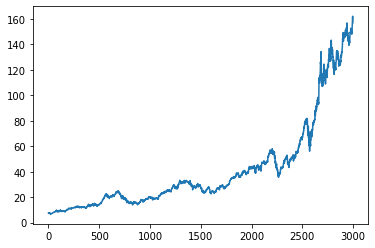

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2993,161.020004,156.529999,157.649994,160.550003,117147500.0
2994,165.699997,161.000000,161.679993,161.020004,117467900.0
2995,161.800003,159.059998,161.119995,161.410004,96041900.0
2996,162.139999,159.639999,160.750000,161.940002,69463600.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2993    147.5176
2994    147.7551
2995    147.9696
2996    148.1688
2997    148.2912
Name: Close, Length: 2998, dtype: float64

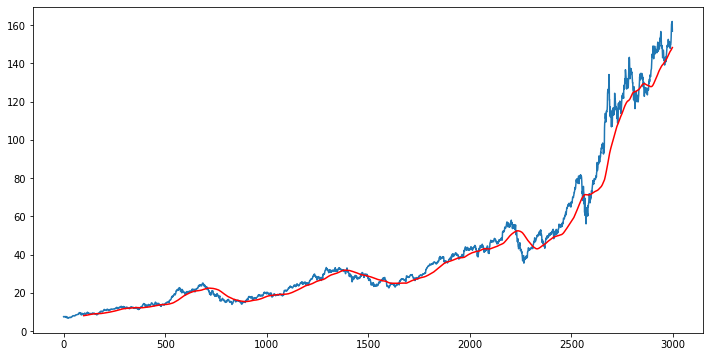

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2993    137.69760
2994    137.81815
2995    137.94515
2996    138.07790
2997    138.18630
Name: Close, Length: 2998, dtype: float64

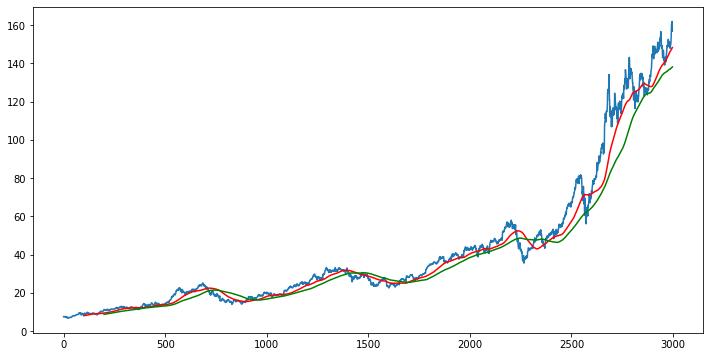

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2998, 5)

In [13]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2098, 1)
(900, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
2098,44.222500
2099,45.957500
2100,46.290001
2101,46.512501
2102,46.840000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01729643],
       [0.02033351],
       [0.02067611],
       ...,
       [0.89331378],
       [0.91820298],
       [0.9666201 ]])

In [18]:
data_training_array.shape

(2098, 1)

In [19]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(1998, 100, 1)

In [21]:
# ML Model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 12s 139ms/step - loss: 0.0524
Epoch 2/50
63/63 [==============================] - 8s 133ms/step - loss: 0.0099
Epoch 3/50
63/63 [==============================] - 8s 126ms/step - loss: 0.0078
Epoch 4/50
63/63 [==============================] - 8s 125ms/step - loss: 0.0074
Epoch 5/50
63/63 [==============================] - 8s 124ms/step - loss: 0.0071
Epoch 6/50
63/63 [==============================] - 8s 125ms/step - loss: 0.0068
Epoch 7/50
63/63 [==============================] - 8s 125ms/step - loss: 0.0070
Epoch 8/50
63/63 [==============================] - 8s 126ms/step - loss: 0.0064
Epoch 9/50
63/63 [==============================] - 8s 127ms/step - loss: 0.0053
Epoch 10/50
63/63 [==============================] - 8s 129ms/step - loss: 0.0051
Epoch 11/50
63/63 [==============================] - 8s 127ms/step - loss: 0.0054
Epoch 12/50
63/63 [==============================] - 8s 126ms/step - loss: 0.0056
Epoch 13/50
63/63 [=====

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
2098,44.222500
2099,45.957500
2100,46.290001
2101,46.512501
2102,46.840000


In [28]:
data_testing.tail()

,Close
2993,160.550003
2994,161.020004
2995,161.410004
2996,161.940002
2997,156.809998


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df = past_100_days.append(data_testing, ignore_index= True)

In [31]:
final_df.head()

,Close
0,42.330002
1,42.342499
2,43.167500
3,42.924999
4,43.067501


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05366221],
       [0.05376109],
       [0.06028838],
       [0.05836975],
       [0.0594972 ],
       [0.0593983 ],
       [0.06285974],
       [0.06770575],
       [0.06398716],
       [0.06361138],
       [0.06491681],
       [0.06491681],
       [0.05613467],
       [0.05619401],
       [0.05714342],
       [0.05348417],
       [0.0594774 ],
       [0.05941807],
       [0.06100045],
       [0.06489704],
       [0.06361138],
       [0.06357181],
       [0.06349267],
       [0.06545087],
       [0.06903098],
       [0.06725082],
       [0.07300671],
       [0.07332316],
       [0.07174081],
       [0.06885297],
       [0.06893208],
       [0.06335423],
       [0.05720276],
       [0.05799393],
       [0.05097218],
       [0.04901398],
       [0.04992383],
       [0.05061613],
       [0.03621654],
       [0.02828491],
       [0.04122079],
       [0.03431768],
       [0.02563442],
       [0.02812667],
       [0.04058786],
       [0.04381192],
       [0.04980516],
       [0.060

In [33]:
input_data.shape

(1000, 1)

In [34]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(900, 100, 1)
(900,)


In [36]:
#Making Predictions

y_predicted = model.predict(x_test)

In [37]:
y_predicted.shape

(900, 1)

In [38]:
y_test

array([0.06863539, 0.08236248, 0.08499318, 0.08675357, 0.0893447 ,
       0.09464563, 0.09177758, 0.09090727, 0.08752497, 0.09096661,
       0.08861286, 0.08726783, 0.08987875, 0.08894911, 0.09132266,
       0.09090727, 0.09175782, 0.09041278, 0.08962161, 0.08837548,
       0.09504125, 0.0981862 , 0.10111358, 0.10243882, 0.1014103 ,
       0.09792906, 0.09699941, 0.09907628, 0.09595109, 0.0961489 ,
       0.09227208, 0.0920743 , 0.0860415 , 0.08764364, 0.08558657,
       0.08451845, 0.07907905, 0.08354924, 0.08301521, 0.08566568,
       0.08489427, 0.08898865, 0.08254049, 0.08546787, 0.09055126,
       0.09571375, 0.09525882, 0.09037325, 0.09660382, 0.09719722,
       0.09636648, 0.09743457, 0.0953577 , 0.09828511, 0.0974148 ,
       0.09775105, 0.10050042, 0.10410033, 0.10289377, 0.09650492,
       0.09438851, 0.09514012, 0.11731313, 0.12896334, 0.13015013,
       0.13228634, 0.12840951, 0.12868643, 0.13191052, 0.12924025,
       0.13189072, 0.13363134, 0.13460055, 0.14069269, 0.14911

In [39]:
y_predicted

array([[0.1623045 ],
       [0.16201545],
       [0.16183734],
       [0.16184935],
       [0.16211239],
       [0.16266556],
       [0.16353202],
       [0.16470517],
       [0.16614705],
       [0.16779193],
       [0.16957001],
       [0.1714074 ],
       [0.17322622],
       [0.17496651],
       [0.17658341],
       [0.1780524 ],
       [0.17936283],
       [0.18051517],
       [0.18151373],
       [0.18236327],
       [0.18306884],
       [0.18365222],
       [0.18415001],
       [0.184606  ],
       [0.18506177],
       [0.18554513],
       [0.18606082],
       [0.1865977 ],
       [0.18714339],
       [0.18767777],
       [0.18817979],
       [0.18862513],
       [0.18899299],
       [0.18925774],
       [0.18940279],
       [0.18941912],
       [0.18930453],
       [0.18905208],
       [0.18867159],
       [0.18818295],
       [0.18761563],
       [0.18700042],
       [0.1863736 ],
       [0.18575579],
       [0.18516308],
       [0.18461779],
       [0.18415362],
       [0.183

In [40]:
scaler.scale_

array([0.00791186])

In [41]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

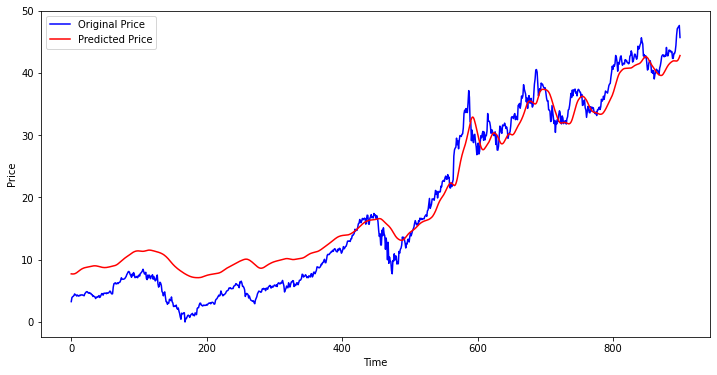

In [42]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()